<a href="https://colab.research.google.com/github/dp-93/Customer-Churn-Prediction-classification-model/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset you uploaded
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Get an overview of the columns and data types
print("--- Dataset Info ---")
df.info()

# See the first few rows
print("\n--- First 5 Rows ---")
print(df.head())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

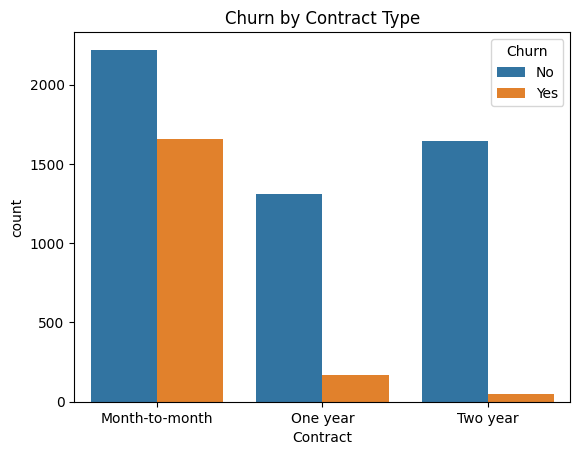

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to see the relationship between Contract and Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

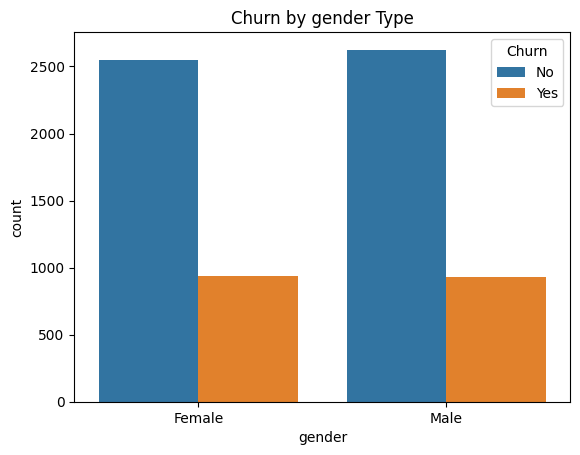

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to see the relationship between Gender and Churn
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by gender Type')
plt.show()

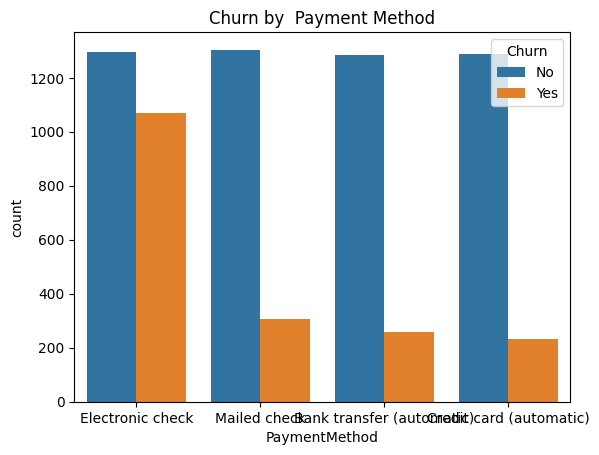

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to see the relationship between Payment Method and Churn
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by  Payment Method')
plt.show()

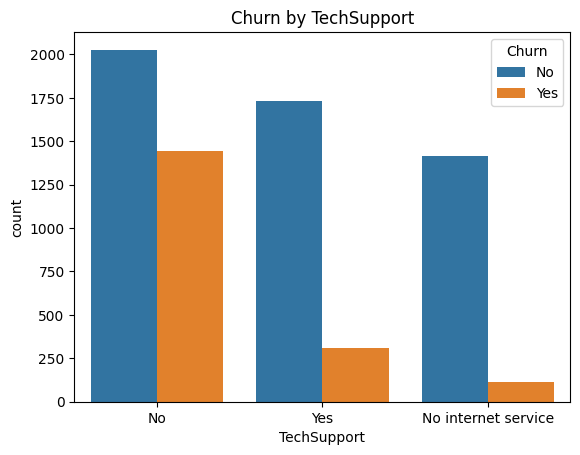

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to see the relationship between TechSupport and Churn
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by TechSupport')
plt.show()

In [7]:
# --- Data Cleaning and Preparation ---

# 1. Fix the 'TotalCharges' column
# Coerce errors will turn any non-numeric values (like ' ') into NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop the few rows with NaN values that were created
df.dropna(inplace=True)

# 2. Convert the 'Churn' column to 0s and 1s
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

# 4. Convert all remaining categorical columns to numbers using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


# --- Verify the result ---
print("--- Data is now fully numerical! ---")
df.info()

print("\n--- First 5 Rows of Prepared Data ---")
print(df.head())

--- Data is now fully numerical! ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Define Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model 1: Logistic Regression ---
print("Training Logistic Regression model...")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)


# --- Model 2: Random Forest ---
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)


# --- Compare Results ---
print("\n--- Model Performance ---")
print(f"Logistic Regression Accuracy: {acc_log * 100:.2f}%")
print(f"Random Forest Accuracy: {acc_rf * 100:.2f}%")

Training Logistic Regression model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest model...

--- Model Performance ---
Logistic Regression Accuracy: 78.75%
Random Forest Accuracy: 78.54%
